# Assignment 4

In [290]:
import ml_pipeline as pp
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
import datetime as dt

## Load data

In [307]:
filename = './data/projects_2012_2013.csv'
df = pp.load_csv(filename)
df.date_posted = pp.col_datetime(df, 'date_posted')
df.datefullyfunded = pp.col_datetime(df,'datefullyfunded')
df = pp.create_label(df, pred_time=60)

In [308]:
windows = [dt.datetime(2012,1,1), dt.datetime(2012,7,1), dt.datetime(2013,1,1), dt.datetime(2013,7,1), dt.datetime(2014,1,1)]
pred_time = 60 #days
label_col = 'label'
split_col = 'date_posted'

In [309]:
# pull data for final test set
x_train1, y_train1, x_test1, y_test1 = pp.single_train_test_set(df, df.columns, label_col, split_col, windows[0], windows[1], windows[2], pred_time, pred_unit = 'day')
x_train2, y_train2, x_test2, y_test2 = pp.single_train_test_set(df, df.columns, label_col, split_col, windows[0], windows[2], windows[3], pred_time, pred_unit = 'day')
x_train3, y_train3, x_test3, y_test3 = pp.single_train_test_set(df, df.columns, label_col, split_col, windows[0], windows[3], windows[4], pred_time, pred_unit = 'day')

## Process data for clustering

### Missing values

In [310]:
pp.na_col(df)

['school_ncesid',
 'school_metro',
 'school_district',
 'primary_focus_subject',
 'primary_focus_area',
 'secondary_focus_subject',
 'secondary_focus_area',
 'resource_type',
 'grade_level',
 'students_reached']

In [311]:
cat_col = ['school_metro',
 'school_district',
 'primary_focus_subject',
 'primary_focus_area',
 'secondary_focus_subject',
 'secondary_focus_area',
 'resource_type',
 'grade_level']
for c in cat_col:
    x_train1 = pp.na_fill_col(x_train1, c, pp.most_freq)
    x_train2 = pp.na_fill_col(x_train2, c, pp.most_freq)
    x_train3 = pp.na_fill_col(x_train3, c, pp.most_freq)
    x_test1 = pp.na_fill_col(x_test1, c, pp.most_freq)
    x_test2 =pp.na_fill_col(x_test2, c, pp.most_freq)
    x_test3=pp.na_fill_col(x_test3, c, pp.most_freq)
    df_all = pp.na_fill_col(df, c, pp.most_freq)

In [312]:
x_train1 = pp.na_fill_col(x_train1, 'students_reached', np.nanmean)
x_train2 = pp.na_fill_col(x_train2, 'students_reached', np.nanmean)
x_train3 = pp.na_fill_col(x_train3, 'students_reached', np.nanmean)
x_test1 = pp.na_fill_col(x_test1, 'students_reached', np.nanmean)
x_test2 =pp.na_fill_col(x_test2, 'students_reached', np.nanmean)
x_test3=pp.na_fill_col(x_test3, 'students_reached', np.nanmean)
df_all = pp.na_fill_col(df, 'students_reached', np.nanmean)

### Categorical variables to binary

In [313]:
df_all = pp.feat_binary(df, ['school_metro','school_charter','primary_focus_subject','primary_focus_area', 'grade_level', 'resource_type'])

In [314]:
x_train1 = pp.feat_binary(x_train1, ['school_metro','school_charter','primary_focus_subject','primary_focus_area', 'grade_level', 'resource_type'])
x_train2 = pp.feat_binary(x_train2, ['school_metro','school_charter','primary_focus_subject','primary_focus_area', 'grade_level', 'resource_type'])
x_train3 = pp.feat_binary(x_train3, ['school_metro','school_charter','primary_focus_subject','primary_focus_area', 'grade_level', 'resource_type'])
x_test1 = pp.feat_binary(x_test1, ['school_metro','school_charter','primary_focus_subject','primary_focus_area', 'grade_level', 'resource_type'])
x_test2 = pp.feat_binary(x_test2, ['school_metro','school_charter','primary_focus_subject','primary_focus_area', 'grade_level', 'resource_type'])
x_test3 = pp.feat_binary(x_test3, ['school_metro','school_charter','primary_focus_subject','primary_focus_area', 'grade_level', 'resource_type'])

### Normalization

In [315]:
num_col = ['total_price_including_optional_support', 'students_reached']

In [316]:
minmax1 = pp.normalize_mult_minmax(x_train1, num_col)
minmax2 = pp.normalize_mult_minmax(x_train2, num_col)
minmax3 = pp.normalize_mult_minmax(x_train3, num_col)
pp.normalize_mult_minmax(x_test1, num_col, minmax1)
pp.normalize_mult_minmax(x_test2, num_col, minmax2)
pp.normalize_mult_minmax(x_test3, num_col, minmax3)
pp.normalize_mult_minmax(df_all, num_col)

MinMaxScaler(copy=True, feature_range=(0, 1))

### Given a k, generate k clusters using KMeans

In [317]:
cat_feat = ['school_metro_rural',
 'school_metro_suburban',
 'school_metro_urban',
 'school_charter_f',
 'school_charter_t',
 'primary_focus_subject_Applied Sciences',
 'primary_focus_subject_Character Education',
 'primary_focus_subject_Civics & Government',
 'primary_focus_subject_College & Career Prep',
 'primary_focus_subject_Community Service',
 'primary_focus_subject_ESL',
 'primary_focus_subject_Early Development',
 'primary_focus_subject_Economics',
 'primary_focus_subject_Environmental Science',
 'primary_focus_subject_Extracurricular',
 'primary_focus_subject_Foreign Languages',
 'primary_focus_subject_Gym & Fitness',
 'primary_focus_subject_Health & Life Science',
 'primary_focus_subject_Health & Wellness',
 'primary_focus_subject_History & Geography',
 'primary_focus_subject_Literacy',
 'primary_focus_subject_Literature & Writing',
 'primary_focus_subject_Mathematics',
 'primary_focus_subject_Music',
 'primary_focus_subject_Nutrition',
 'primary_focus_subject_Other',
 'primary_focus_subject_Parent Involvement',
 'primary_focus_subject_Performing Arts',
 'primary_focus_subject_Social Sciences',
 'primary_focus_subject_Special Needs',
 'primary_focus_subject_Sports',
 'primary_focus_subject_Visual Arts',
 'primary_focus_area_Applied Learning',
 'primary_focus_area_Health & Sports',
 'primary_focus_area_History & Civics',
 'primary_focus_area_Literacy & Language',
 'primary_focus_area_Math & Science',
 'primary_focus_area_Music & The Arts',
 'primary_focus_area_Special Needs',
 'grade_level_Grades 3-5',
 'grade_level_Grades 6-8',
 'grade_level_Grades 9-12',
 'grade_level_Grades PreK-2',
 'resource_type_Books',
 'resource_type_Other',
 'resource_type_Supplies',
 'resource_type_Technology',
 'resource_type_Trips',
 'resource_type_Visitors']
num_feat = ['total_price_including_optional_support', 'students_reached']
features = cat_feat + num_feat

In [364]:
# rename columns so they can shown by export_graphviz
for c in df_final.columns:
    if '&' in c:
        new = c.replace(' & ', '')
        x_train1 = x_train1.rename(columns = {c:new})
        x_train2 = x_train2.rename(columns = {c:new})
        x_train3 = x_train3.rename(columns = {c:new})
        x_test1 = x_test1.rename(columns = {c:new})
        x_test2 = x_test2.rename(columns = {c:new})
        x_test3 = x_test3.rename(columns = {c:new})
        df_all = df_all.rename(columns = {c:new})
        features.remove(c)
        features.append(new)

In [319]:
# reset index
x_train1 = x_train1.reset_index()
x_train2 = x_train2.reset_index()
x_train3 = x_train3.reset_index()
x_test1 = x_test1.reset_index()
x_test2 = x_test2.reset_index()
x_test3 = x_test3.reset_index()

In [320]:
df_all['cluster_prediction'] = pp.kmeans_label(KMeans(), {'n_clusters':2}, df_all[features])
x_train1['cluster_prediction'] = pp.kmeans_label(KMeans(), {'n_clusters':2}, x_train1[features])
x_train2['cluster_prediction'] = pp.kmeans_label(KMeans(), {'n_clusters':2}, x_train2[features])
x_train3['cluster_prediction'] = pp.kmeans_label(KMeans(), {'n_clusters':2}, x_train3[features])
x_test1['cluster_prediction'] = pp.kmeans_label(KMeans(), {'n_clusters':2}, x_test1[features])
x_test2['cluster_prediction'] = pp.kmeans_label(KMeans(), {'n_clusters':2}, x_test2[features])
x_test3['cluster_prediction'] = pp.kmeans_label(KMeans(), {'n_clusters':2}, x_test3[features])

## Summary statistics for each cluster

### Identify the number of data points in each cluster

In [321]:
pp.cluster_size(df_all, 'cluster_prediction')

cluster_prediction
0    68910
1    56066
Name: cluster_prediction, dtype: int64

In [322]:
pp.precision_at_threshold(df_all['label'], df_all['cluster_prediction'])

0.30740555773552597

In [323]:
# test set 1
pp.cluster_size(x_test1, 'cluster_prediction')

cluster_prediction
0    18104
1    14856
Name: cluster_prediction, dtype: int64

In [324]:
pp.precision_at_threshold(y_test1, x_test1['cluster_prediction'])

0.27187668282175553

In [325]:
# test set 2
pp.cluster_size(x_test2, 'cluster_prediction')

cluster_prediction
0     9530
1    12177
Name: cluster_prediction, dtype: int64

In [326]:
pp.precision_at_threshold(y_test2, x_test2['cluster_prediction'])

0.3004023979633736

In [327]:
# final test set
pp.cluster_size(x_test3, 'cluster_prediction')

cluster_prediction
0    19613
1    24554
Name: cluster_prediction, dtype: int64

In [328]:
pp.precision_at_threshold(y_test3, x_test3['cluster_prediction'])

0.26875458173820965

### Summarize features in each cluster

In [329]:
pp.summarize_kmeans_features(x_test1, 'cluster_prediction')

,cluster_prediction,0,1
index,mean,62410.540653999116,62692.114095315024
school_ncesid,mean,249526295595.02765,261815742509.61038
school_latitude,mean,36.96648473547292,37.12661719520725
school_longitude,mean,-96.80654093874246,-94.32292013099082
total_price_including_optional_support,mean,0.005751896680662576,0.0045342486910804084
students_reached,mean,0.010230445837090334,0.00546077461402503
label,mean,0.2446420680512594,0.27187668282175553
school_metro_rural,mean,0.11815068493150685,0.10756596661281637
school_metro_suburban,mean,0.2702165267344233,0.25854873451803984
school_metro_urban,mean,0.6116327883340699,0.6338852988691438


In [330]:
pp.summarize_kmeans_features(x_test2, 'cluster_prediction')

,cluster_prediction,0,1
index,mean,62808.601573976914,61888.73638827298
school_ncesid,mean,253602826011.5444,244308549066.08783
school_latitude,mean,37.32167131269662,37.20553861304127
school_longitude,mean,-92.17350570881413,-94.18459002217345
total_price_including_optional_support,mean,0.010787932394781735,0.013340851920420428
students_reached,mean,0.06414516246768633,0.11155586963807676
label,mean,0.33567681007345224,0.3004023979633736
school_metro_rural,mean,0.12497376705141658,0.13131313131313133
school_metro_suburban,mean,0.27051416579223503,0.25671347622567137
school_metro_urban,mean,0.6045120671563484,0.6119733924611973


In [331]:
pp.summarize_kmeans_features(x_test3, 'cluster_prediction')

,cluster_prediction,0,1
index,mean,62633.34732065467,62539.18831962206
school_ncesid,mean,260545570712.56766,247766270121.90298
school_latitude,mean,36.61483417106,36.52179502753128
school_longitude,mean,-94.12002617019314,-95.9845992475771
total_price_including_optional_support,mean,0.0031388639715564833,0.004307736883367864
students_reached,mean,0.06385232607671905,0.1241334587395884
label,mean,0.3045429052159282,0.26875458173820965
school_metro_rural,mean,0.11058991485239382,0.11717031848171378
school_metro_suburban,mean,0.2816499260694437,0.28985094078357904
school_metro_urban,mean,0.6077601590781625,0.5929787407347071


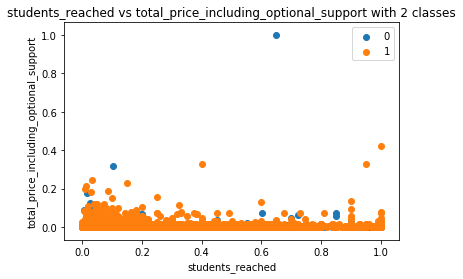

In [332]:
pp.plot_2d_cluster(x_test3, 'cluster_prediction','students_reached', 'total_price_including_optional_support')

### Identify "distinctive" features of clusters

In [365]:
df_all.columns

Index(['projectid', 'teacher_acctid', 'schoolid', 'school_ncesid',
       'school_latitude', 'school_longitude', 'school_city', 'school_state',
       'school_district', 'school_county', 'school_magnet', 'teacher_prefix',
       'secondary_focus_subject', 'secondary_focus_area', 'poverty_level',
       'total_price_including_optional_support', 'students_reached',
       'eligible_double_your_impact_match', 'date_posted', 'datefullyfunded',
       'label', 'school_metro_rural', 'school_metro_suburban',
       'school_metro_urban', 'school_charter_f', 'school_charter_t',
       'primary_focus_subject_Applied Sciences',
       'primary_focus_subject_Character Education',
       'primary_focus_subject_CivicsGovernment',
       'primary_focus_subject_CollegeCareer Prep',
       'primary_focus_subject_Community Service', 'primary_focus_subject_ESL',
       'primary_focus_subject_Early Development',
       'primary_focus_subject_Economics',
       'primary_focus_subject_Environmental Science'

In [366]:
# fit classifier
features.append('primary_focus_area_LiteracyLanguage')
dt_1 = DecisionTreeClassifier(max_depth = 5)
dt_1.fit(df_all[features], df_all['cluster_prediction'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [368]:
# graph tree
pp.graph_tree(dt_1, features, 'treeall.png')

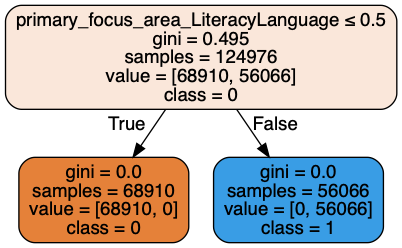

In [369]:
# show image
Image('treeall.png')

### Now look at distinguishing features when removing 'primary_focus_area_LiteracyLanguage'

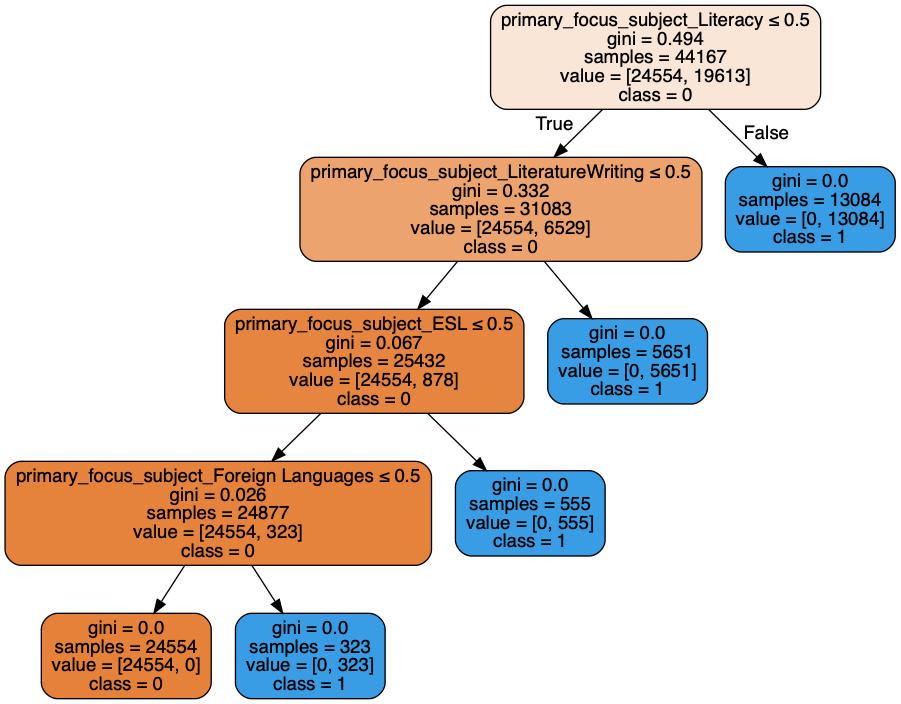

In [288]:
features.remove('primary_focus_area_LiteracyLanguage')
dt_2 = DecisionTreeClassifier(max_depth = 5)
dt_2.fit(x_test3[features], x_test3['cluster_prediction'])
pp.graph_tree(dt_2, features, 'tree3_2.png')
Image('tree3_2.png')

# Further analysis

## Merge clusters into one

In [334]:
# create fake dataset to run these on 
df_final = x_test1.copy()

In [335]:
z=pp.merge_clusters(df_final, 'cluster_prediction', [0,1],1)

In [336]:
z['cluster_prediction'].unique()

array([1])

## Recluster with a new k

In [355]:
df_final['cluster_prediction'] = pp.kmeans_label(KMeans(), {'n_clusters':3}, df_final[features])

In [356]:
df_final['cluster_prediction'].unique()

array([0, 1, 2])

## Split a specific cluster into many (with a specific number of new clustering)

In [358]:
df_final =pp.split_cluster(df_final, 'cluster_prediction', features,2, {'n_clusters':3},[2,3,4])

In [359]:
df_final['cluster_prediction'].unique()

array([0., 1., 2., 3., 4.])